unzip:  cannot find or open /content/drive/My Drive/dataset.zip, /content/drive/My Drive/dataset.zip.zip or /content/drive/My Drive/dataset.zip.ZIP.


In [1]:
!unzip "/content/drive/My Drive/final_dataset.zip"

Archive:  /content/drive/My Drive/final_dataset.zip
   creating: final_dataset/
   creating: final_dataset/evaluation/
   creating: final_dataset/evaluation/check/
  inflating: final_dataset/evaluation/check/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: final_dataset/evaluation/check/NORMAL2-IM-1269-0001-0002.jpeg  
   creating: final_dataset/test/
   creating: final_dataset/test/covid/
  inflating: final_dataset/test/covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg  
  inflating: final_dataset/test/covid/03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg  
  inflating: final_dataset/test/covid/1-s2.0-S0140673620303706-fx1_lrg.jpg  
  inflating: final_dataset/test/covid/1-s2.0-S1684118220300608-main.pdf-001.jpg  
  inflating: final_dataset/test/covid/1-s2.0-S1684118220300608-main.pdf-002.jpg  
  inflating: final_dataset/test/covid/1-s2.0-S1684118220300682-main.pdf-002-a1.png  
  inflating: final_dataset/test/covid/1-s2.0-S1684118220300682-main.pdf-002-a2.p

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from tensorflow.keras.layers import Dropout
from tensorflow import keras
from tensorflow.keras.layers import Dense,MaxPooling2D,Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.models import Sequential
from keras.layers import LeakyReLU

In [3]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [55]:
f_model=Sequential()
f_model.add(Conv2D(
                   filters=32,
                   kernel_size=(3,3),
                   activation="relu",
                   input_shape=(224,224,3)
                   ))
f_model.add(MaxPooling2D(pool_size=(2,2)))
f_model.add(Dropout(0.25))

f_model.add(Conv2D(
                   filters=64,
                   kernel_size=(3,3),
                   activation="relu"

                   ))

f_model.add(MaxPooling2D(pool_size=(2,2)))
f_model.add(Dropout(0.25))

f_model.add(Conv2D(
                   filters=128,
                   kernel_size=(3,3),
                   activation="relu"

                   ))

f_model.add(MaxPooling2D(pool_size=(2,2)))
f_model.add(Dropout(0.25))


f_model.add(Flatten())
f_model.add(Dense(
                  units=64,
                  activation="relu",
                  ))
f_model.add(Dense(1,activation="sigmoid"))
f_model.compile(optimizer="adam",
                loss="binary_crossentropy",metrics=["accuracy"])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [56]:
f_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │     5,537,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,631,169 (21.48 MB)

 Trainable params: 5,631,169 (21.48 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [43]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen =ImageDataGenerator(rescale=1./255)

In [44]:
train_generator = train_datagen.flow_from_directory(
        "/content/final_dataset/train",
        target_size=(224,224),
        batch_size=32,
        class_mode='binary')

Found 220 images belonging to 2 classes.


In [45]:
train_generator.class_indices

{'covid': 0, 'normal': 1}

In [46]:
validation_generator = test_datagen.flow_from_directory(
        "/content/final_dataset/test",
        target_size=(224,224),
        batch_size=32,
        class_mode='binary')

Found 60 images belonging to 2 classes.


In [47]:
validation_generator.class_indices

{'covid': 0, 'normal': 1}

In [57]:
mod=f_model.fit(
        train_generator,
        steps_per_epoch=5,
        epochs=20,
        validation_data=validation_generator,
        validation_steps=2)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 28s 5s/step - accuracy: 0.5330 - loss: 2.6183 - val_accuracy: 0.9667 - val_loss: 0.6450
Epoch 2/20
2/5 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.8203 - loss: 0.5286 

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.7500 - loss: 0.5492 - val_accuracy: 0.5000 - val_loss: 0.6812
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 28s 5s/step - accuracy: 0.4724 - loss: 0.7232 - val_accuracy: 0.5000 - val_loss: 0.6872
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.4375 - loss: 0.6919 - val_accuracy: 0.5000 - val_loss: 0.6825
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 25s 5s/step - accuracy: 0.5687 - loss: 0.6881 - val_accuracy: 0.8500 - val_loss: 0.6541
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.5562 - loss: 0.6686 - val_accuracy: 0.7000 - val_loss: 0.6435
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 31s 5s/step - accuracy: 0.6214 - loss: 0.6584 - val_accuracy: 0.8833 - val_loss: 0.5723
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.7786 - loss: 0.5570 - val_accuracy: 0.8833 - val_loss: 0.4793
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 31s 5s/step - accuracy: 0.8332 - loss: 0.4294 - val_accuracy: 0.9833 - val_loss: 0.2040
Epoch 10/20
5/5 ━━━━

In [74]:
loss, accuracy = f_model.evaluate(validation_generator)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 698ms/step - accuracy: 1.0000 - loss: 0.0821
Validation Loss: 0.0831
Validation Accuracy: 1.0000


In [75]:
loss, accuracy = model.evaluate(validation_generator)
import numpy as np
from keras .preprocessing import image
test_image=image.load_img("/content/final_dataset/evaluation/check/NORMAL2-IM-1269-0001-0002.jpeg",target_size=(224,224))
test_image=image.img_to_array(test_image)
test_image=test_image/255.0
test_image=np.expand_dims(test_image,axis=0)
result=f_model.predict(test_image)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 697ms/step - accuracy: 1.0000 - loss: 0.0463
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


In [76]:
result
if(result>0.5):
  print("Normal")
else:
  print("Covid-19")

Normal


In [77]:
result

array([[0.9878865]], dtype=float32)

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline
from keras.callbacks import History

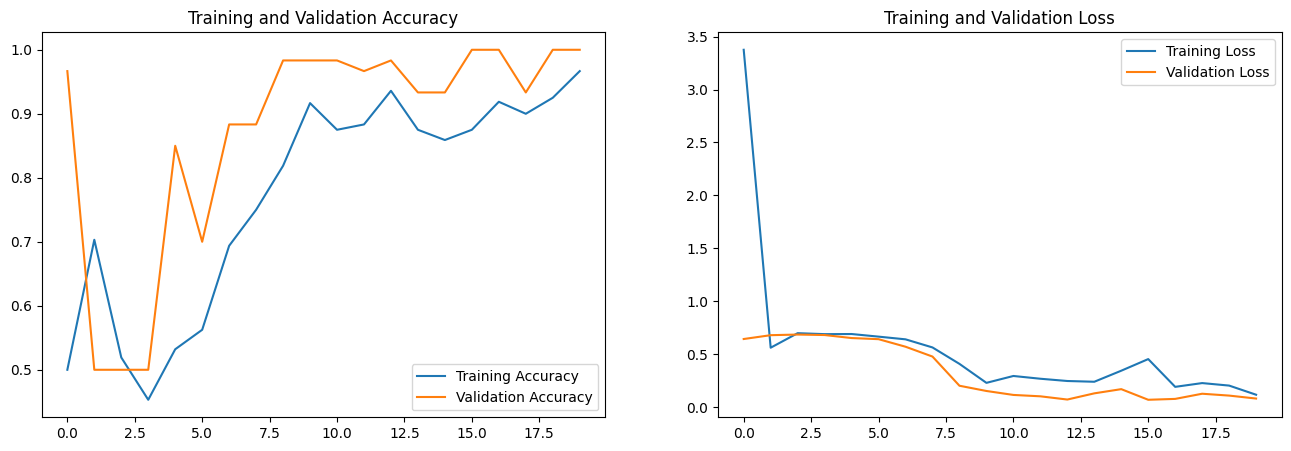

In [68]:
epochs=20
acc = mod.history['accuracy']
val_acc = mod.history['val_accuracy']

loss = mod.history['loss']
val_loss = mod.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [79]:
f_model.save("/content/drive/My Drive/covidmodel_final.h5")

In [80]:
from tensorflow import keras
new_model=keras.models.load_model("/content/drive/My Drive/covidmodel_final.h5")

In [88]:
test_image=image.load_img("/content/final_dataset/evaluation/check/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg",target_size=(224,224))
test_image=image.img_to_array(test_image)
test_image=test_image/255.0
test_image=np.expand_dims(test_image,axis=0)
result=new_model.predict(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


In [89]:
result


array([[0.16426964]], dtype=float32)

In [90]:

result
if(result>0.5):
  print("Normal")
else:
  print("Covid-19")


Covid-19
